# Example QPE implementation with U = Phase gate and custom defined Inverse QFT function IQFT

In [1]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister

In [2]:
def some(theta,n=1, name='xh'):
    qc = QuantumCircuit(n, name=name)
    qc.p(theta*2*3.14, 0)
    return qc

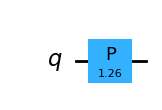

In [3]:

some(0.2).draw('mpl')


In [6]:
theta = 0.2
U_gate = some(theta).to_gate()
U_gate.label = "phase gate"
Con_U =U_gate.control()

In [8]:
from numpy import pi
def IQFT(n,name='IQFT'):
    iqftn=QuantumCircuit(n,name=name)
    for i in range(int(n/2)):
        iqftn.swap(i,n-1-i)
    for i in range(0,n):
        p=0
        iqftn.barrier()
        for j in range(i):
            p+=1
            iqftn.cp(-pi/(2**(p)),i-j-1,i)
        iqftn.h(i)
    return iqftn

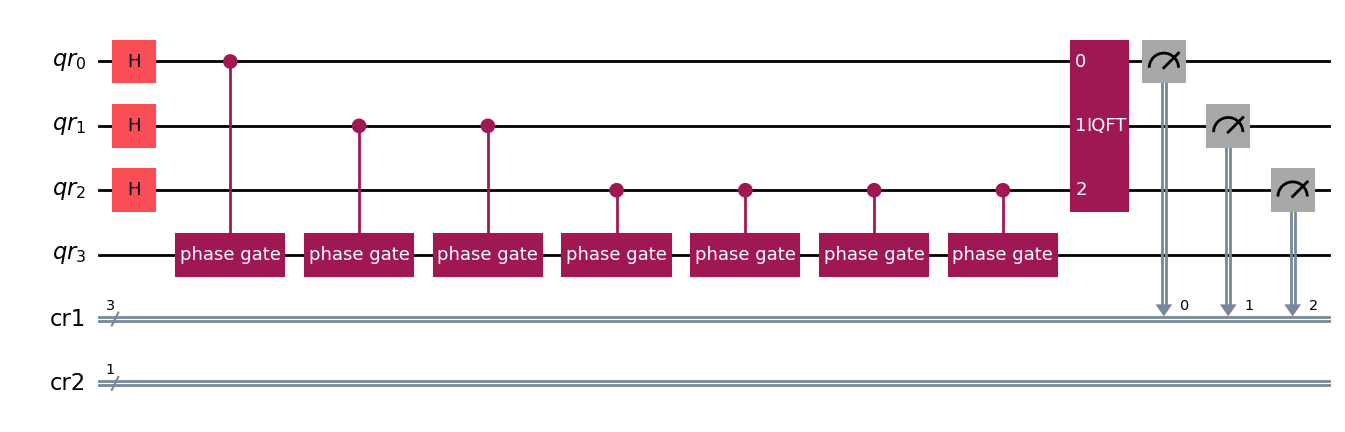

In [ ]:
n=1
c=3
qr = QuantumRegister(n+c, name='qr')
cr1 = ClassicalRegister(c, name='cr1')
cr2 = ClassicalRegister(n, name='cr2')
qc=QuantumCircuit(qr,cr1,cr2)

for qubit in range(c):
    qc.h(qubit)

qc.x(c+n-1) # to initialize eigen vector of Phase gate to |1>
for x in range(c):
        exponent = 2**(x)
        for j in range(exponent):
            qc.append(Con_U,[x] + list(range(c, n+c)))

qc.append(IQFT(c), range(c))       

for i in range(c):
    qc.measure(qr[i],cr1[i])

    
qc.draw('mpl')

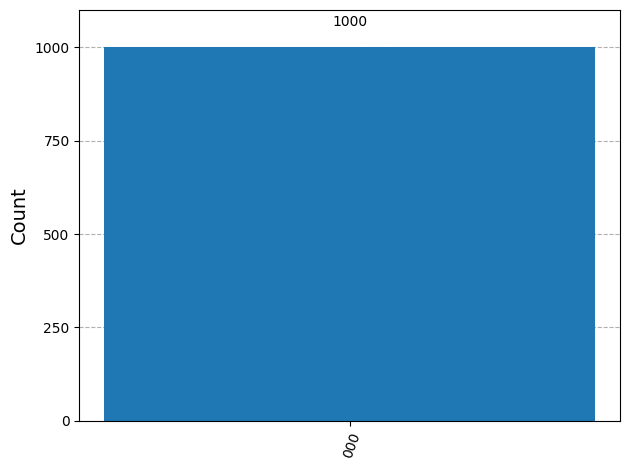

In [26]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator
from qiskit import transpile
backend_aer = AerSimulator()


qc_aer = transpile(qc, backend_aer)
sampler = Sampler(mode=backend_aer)
job = sampler.run([(qc_aer,None,1000)])
result = job.result()
counts_phase = result[0].data.cr1.get_counts()



plot_histogram(counts_phase)

In [27]:
phase = max(counts_phase, key=counts_phase.get)
print('measured output state  = ',phase)

measured output state  =  000


In [28]:
measured_theta = int(phase, 2)/2**c
print("Using ", c, " qubits, measured_theta = ", measured_theta,', where actual theta  = ',theta)

Using  3  qubits, measured_theta =  0.0 , where actual theta  =  0.2
